In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gaussian_2d import f_noravel
from scipy.ndimage.filters import gaussian_filter

In [2]:
#photonImage = np.zeros((128, 128))
image = np.zeros((128, 128))
xx, yy = np.meshgrid(np.arange(128), np.arange(128))

seed = 42
rs = np.random.RandomState(seed)
#intensityDist = []

In [3]:
def getFilterSigma(row, col):
    return (row-64)**4+(col-64)**4 + 0.0000001

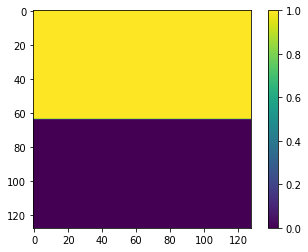

In [4]:
screen = np.zeros((128, 128))
ones = np.ones((128, 128))
screen[:int(len(screen)/2)] = ones[:int(len(screen)/2)]

plt.imshow(screen)
plt.colorbar()

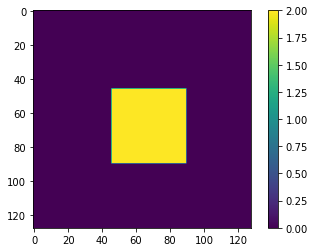

In [5]:
square = np.zeros((128,128))

for rowi, row in enumerate(square):
        for coli, col in enumerate(row):
            pixel = square[rowi, coli]
            if 45 < rowi < 90:
                if 45 < coli < 90:
                    pixel += 1
                    if 45 < rowi < 90:
                        pixel += 1
        
            square[rowi, coli] += pixel

plt.imshow(square)
plt.colorbar()

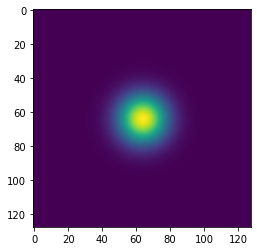

In [6]:
def gaus(x, x0, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-x0)**2/(2*sigma**2)))

gaus2d = gaus(xx, 64, 10)*gaus(yy, 64, 10)

plt.imshow(gaus2d)

In [7]:
def gaussian(intensityDist, x, y, x0, y0, sigma):
    def eqn(x, x0, sigma):
        return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-x0)**2/(2*sigma**2)))
    gaus_2d = eqn(xx, x0, sigma)*eqn(yy, y0, sigma)
    return gaus_2d*intensityDist

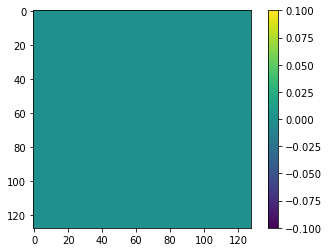

In [8]:
for rowi, row in enumerate(square):
    for coli, col in enumerate(row):
        #filterSigma = getFilterSigma(rowi,coli)
        filterSigma = 25
        intensityDist=square[rowi,coli]
        square += gaussian(intensityDist, x=rowi, y=coli, x0=64, y0=64, sigma=filterSigma)



plt.imshow(image)
plt.colorbar()